In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/onlinefoods.csv")

In [5]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [7]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

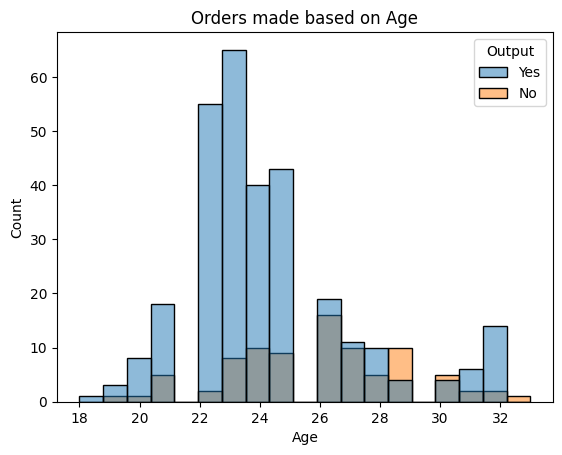

In [9]:
plt.title("Orders made based on Age")
sns.histplot(x="Age", hue="Output", data=df)
plt.show()

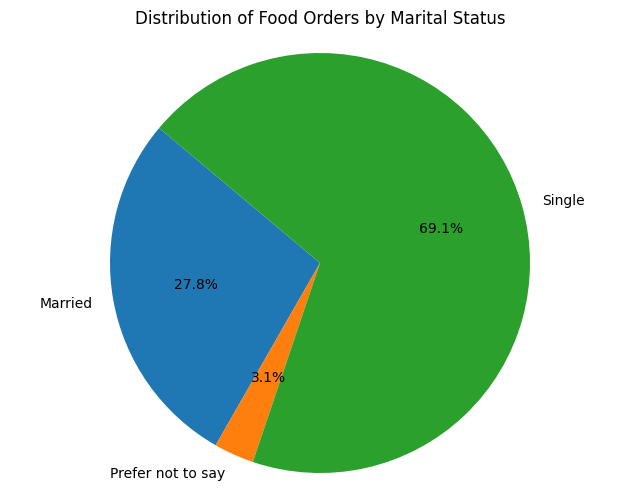

In [10]:
# Group the data by marital status and calculate total orders for each group
orders_by_marital_status = df.groupby('Marital Status').size()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(orders_by_marital_status, labels=orders_by_marital_status.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Food Orders by Marital Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

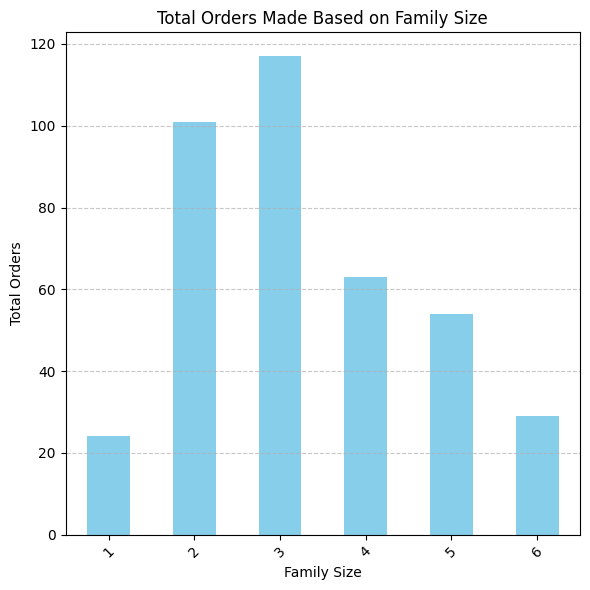

In [11]:
# Grouping the data by family size and calculate total orders made for each family size
orders_by_family_size = df.groupby('Family size').size()

# Create a bar plot
plt.figure(figsize=(6, 6))
orders_by_family_size.plot(kind='bar', color='skyblue')
plt.title('Total Orders Made Based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

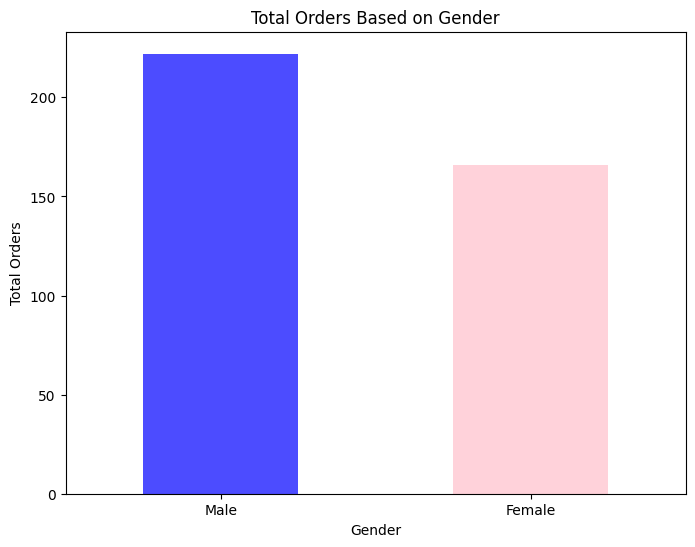

In [12]:
# Group the data by gender and calculate total orders for each group
orders_by_gender = df['Gender'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
orders_by_gender.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Total Orders Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Converting Categorical features into Numerical features
df['Marital Status'] = df['Marital Status'].map({'Prefer not to say':0,'Single':2,'Married':1,})
df['Occupation'] = df['Occupation'].map({'Student':0, 'House wife':1, 'Employee':2,'Self Employeed': 3,})
df['Monthly Income'] = df['Monthly Income'].map({'No Income':0,'Below Rs.10000':1,'10001 to 25000':2,'25001 to 50000':3,'More than 50000':4})
df['Educational Qualifications'] = df['Educational Qualifications'].map({'Uneducated':0, 'School':1, 'Graduate':2,'Post Graduate': 3,'Ph.D':4})
df['Feedback'] = df['Feedback'].map({'Negative ':0,'Positive':1})
df['Output'] = df['Output'].map({'No':0,'Yes':1,})
df['Gender'] = df['Gender'].map({'Female':0,'Male':1,})
df = df.drop(columns=["latitude", 'longitude', 'Pin code'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         388 non-null    int64
 1   Gender                      388 non-null    int64
 2   Marital Status              388 non-null    int64
 3   Occupation                  388 non-null    int64
 4   Monthly Income              388 non-null    int64
 5   Educational Qualifications  388 non-null    int64
 6   Family size                 388 non-null    int64
 7   Output                      388 non-null    int64
 8   Feedback                    388 non-null    int64
dtypes: int64(9)
memory usage: 27.4 KB


In [14]:
# Dropping all the null values detected
data = df.dropna(subset=['Feedback'])

In [15]:
# Converting the categorical features into dummy columns.
categorical_features = ['Gender']
DataFrame = pd.get_dummies(data, columns = categorical_features)

In [16]:
final_data = df

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         388 non-null    int64
 1   Gender                      388 non-null    int64
 2   Marital Status              388 non-null    int64
 3   Occupation                  388 non-null    int64
 4   Monthly Income              388 non-null    int64
 5   Educational Qualifications  388 non-null    int64
 6   Family size                 388 non-null    int64
 7   Output                      388 non-null    int64
 8   Feedback                    388 non-null    int64
dtypes: int64(9)
memory usage: 27.4 KB


In [18]:
final_data.describe()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,0.572165,1.659794,1.048969,1.469072,2.525773,3.280928,0.775773,0.817010
std,2.975593,0.495404,0.535781,1.181325,1.591831,0.679607,1.351025,0.417611,0.387157
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,23.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000
50%,24.000000,1.000000,2.000000,0.000000,1.000000,3.000000,3.000000,1.000000,1.000000
75%,26.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000
max,33.000000,1.000000,2.000000,3.000000,4.000000,4.000000,6.000000,1.000000,1.000000


In [19]:
# Dividing dataset into label and feature sets (Selecting the target feature)
X = final_data.drop('Output', axis = 1)
Y = final_data['Output'] # Target column
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(388, 8)
(388,)


In [20]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [21]:
# #####################################################
# Implementing Gradient Boost without feature selection
# Tuning the GradientBoost parameter 'n_estimators', 'learning_rate', 'max_depth' and implementing cross-validation using Grid Search
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', GradientBoostingClassifier(random_state=1, max_features="sqrt"))
    ])
grid_param = {'classification__n_estimators': [5,10,15,20], 'classification__learning_rate': [0.1,0.15,0.5,0.8],'classification__max_depth': [1,3,8,16,32]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=5)


In [22]:
# ################################
# Fitting the model to our dataset
gd_sr.fit(X_scaled, Y)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

featimp = pd.Series(gd_sr.best_estimator_.named_steps["classification"].feature_importances_, index=list(X)).sort_values(ascending=False) # Getting feature importances list for the best model
print(featimp)

{'classification__learning_rate': 0.8, 'classification__max_depth': 8, 'classification__n_estimators': 10}
0.9468306010928961
Feedback                      0.338349
Age                           0.201534
Family size                   0.147786
Educational Qualifications    0.089327
Gender                        0.075527
Monthly Income                0.068910
Occupation                    0.052502
Marital Status                0.026065
dtype: float64


In [23]:
# Testing Random Forest Algorithm


# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Output'])  # Features
y = df['Output']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.08343253522915578
